In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
nsei = yf.Ticker("^NSEI")
nsei_history = nsei.history(period="180d")
nsei = nsei_history
nsei.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-11 00:00:00+05:30,16136.150391,16248.549805,16115.500000,16216.000000,255900,0.0,0.0
2022-07-12 00:00:00+05:30,16126.200195,16158.750000,16031.150391,16058.299805,208600,0.0,0.0
2022-07-13 00:00:00+05:30,16128.200195,16140.000000,15950.150391,15966.650391,233300,0.0,0.0
2022-07-14 00:00:00+05:30,16018.849609,16070.849609,15858.200195,15938.650391,228600,0.0,0.0
2022-07-15 00:00:00+05:30,16010.799805,16066.950195,15927.299805,16049.200195,205800,0.0,0.0
2022-07-18 00:00:00+05:30,16151.400391,16287.950195,16142.200195,16278.500000,227700,0.0,0.0
2022-07-19 00:00:00+05:30,16187.049805,16359.500000,16187.049805,16340.549805,222600,0.0,0.0
2022-07-20 00:00:00+05:30,16562.800781,16588.000000,16490.949219,16520.849609,284400,0.0,0.0
2022-07-21 00:00:00+05:30,16523.550781,16626.949219,16483.900391,16605.250000,243600,0.0,0.0


In [3]:
nsei.shape

(180, 7)

In [4]:
nsei.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [5]:
#Today volume will be conisider as zero
min_vol = nsei["Volume"].sort_values()
min_vol

Date
2022-08-16 00:00:00+05:30         0
2023-03-22 00:00:00+05:30         0
2022-10-24 00:00:00+05:30     45000
2022-12-19 00:00:00+05:30    154800
2022-12-20 00:00:00+05:30    169000
                              ...  
2022-09-16 00:00:00+05:30    468500
2023-01-27 00:00:00+05:30    476300
2023-02-02 00:00:00+05:30    490100
2022-09-26 00:00:00+05:30    492000
2023-02-01 00:00:00+05:30    512900
Name: Volume, Length: 180, dtype: int64

In [6]:
nsei.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.0,180.0
mean,17680.070855,17756.649745,17576.227214,17668.632199,263442.777778,0.0,0.0
std,594.118374,585.160510,596.065270,592.318661,75968.602034,0.0,0.0
min,16010.799805,16066.950195,15858.200195,15938.650391,0.000000,0.0,0.0
25%,17355.324707,17423.475586,17216.674316,17325.987305,216750.000000,0.0,0.0
50%,17761.375000,17811.325195,17644.775391,17726.125000,252900.000000,0.0,0.0
75%,18093.699707,18146.399414,18015.636719,18087.437012,289850.000000,0.0,0.0
max,18871.949219,18887.599609,18778.199219,18812.500000,512900.000000,0.0,0.0


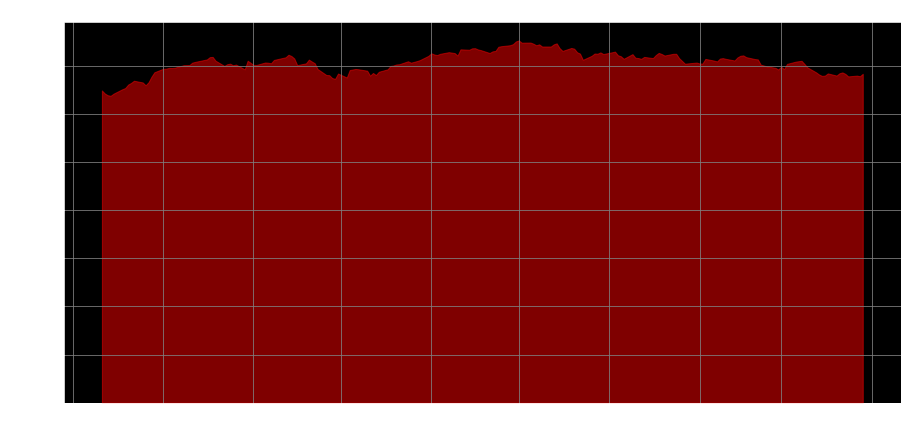

In [7]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, nsei["Close"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("NSEI")
plt.show()
plt.close()

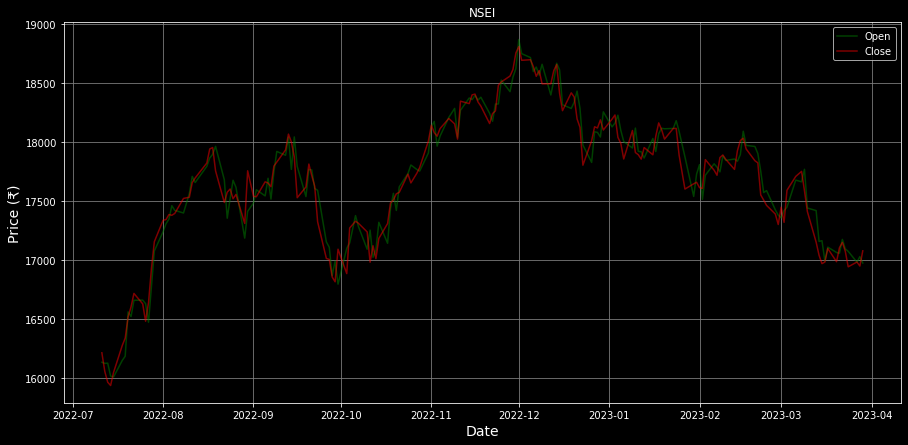

In [8]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.plot(nsei.index, nsei["Open"], color="green", label="Open", alpha=0.50)
plt.plot(nsei.index, nsei["Close"], color="red", label="Close", alpha=0.50)
plt.legend()
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("NSEI")
plt.show()
plt.close()

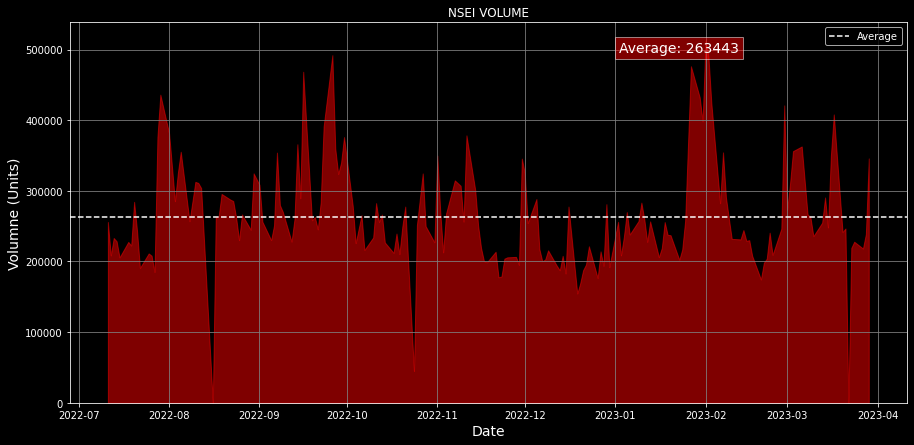

In [9]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, nsei["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volumne (Units)",fontsize=14)
plt.title("NSEI VOLUME")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
average = nsei["Volume"].mean()
plt.axhline(average, color="white", linestyle="--", label="Average")
plt.legend()
plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.show()
plt.close()

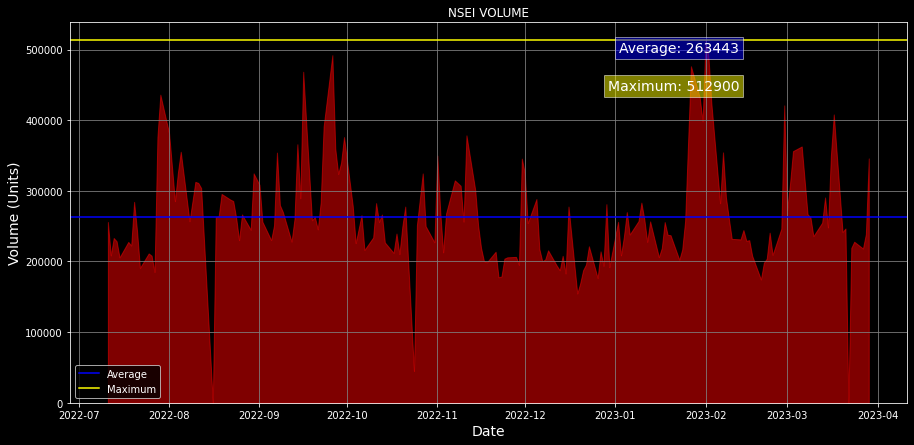

In [10]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, nsei["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI VOLUME")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = nsei["Volume"].mean()
# minimum = nsei["Volume"].min()
maximum = nsei["Volume"].max()

plt.axhline(average, color="blue", label="Average")
# plt.axhline(minimum, color="white", label="Minimum")
plt.axhline(maximum, color="yellow", label="Maximum")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='blue', alpha=0.5))
# plt.text(0.8, 0.90, 'Minimum: {:.0f}'.format(minimum), transform=plt.gca().transAxes,
#          fontsize=14, verticalalignment='top', horizontalalignment='right',
#          bbox=dict(facecolor='white', alpha=0.5))
plt.text(0.8, 0.85, 'Maximum: {:.0f}'.format(maximum), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
plt.close()

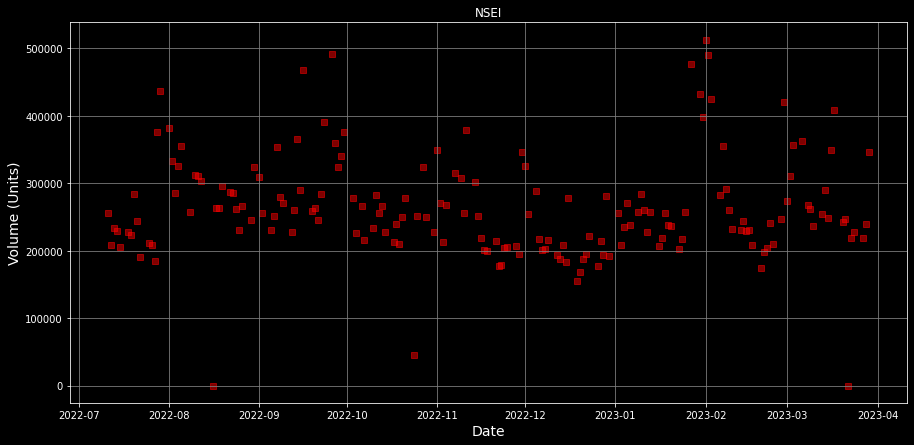

In [11]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, nsei["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI")
plt.show()
plt.close()

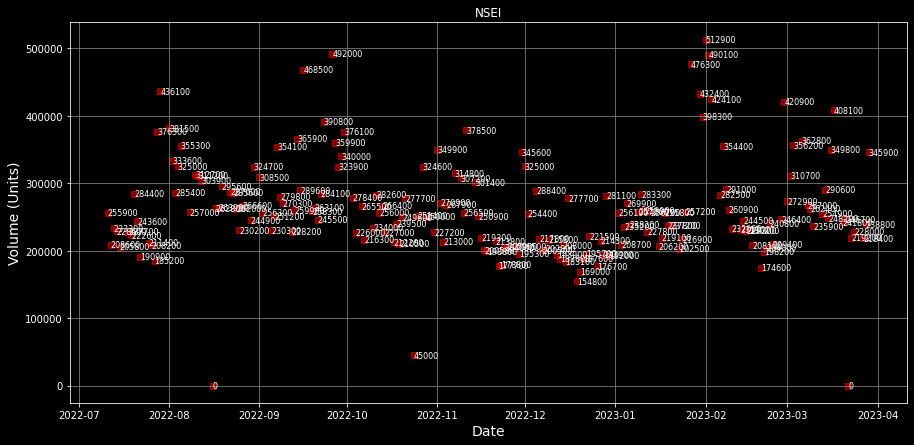

In [12]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, nsei["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI")

for i, txt in enumerate(nsei["Volume"]):
    plt.text(nsei.index[i], nsei["Volume"][i], txt, fontsize=8, verticalalignment='center')

plt.show()
plt.close()

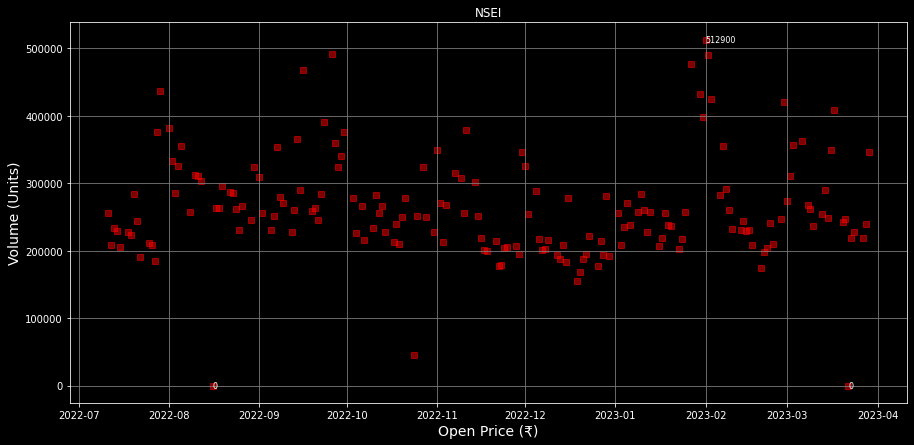

In [13]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, nsei["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Open Price (₹)",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("NSEI")

min_vol = nsei["Volume"].min()
max_vol = nsei["Volume"].max()

for i, txt in enumerate(nsei["Volume"]):
    if txt == min_vol or txt == max_vol:
        plt.text(nsei.index[i], nsei["Volume"][i], txt, fontsize=8, verticalalignment='center')

plt.show()
plt.close()

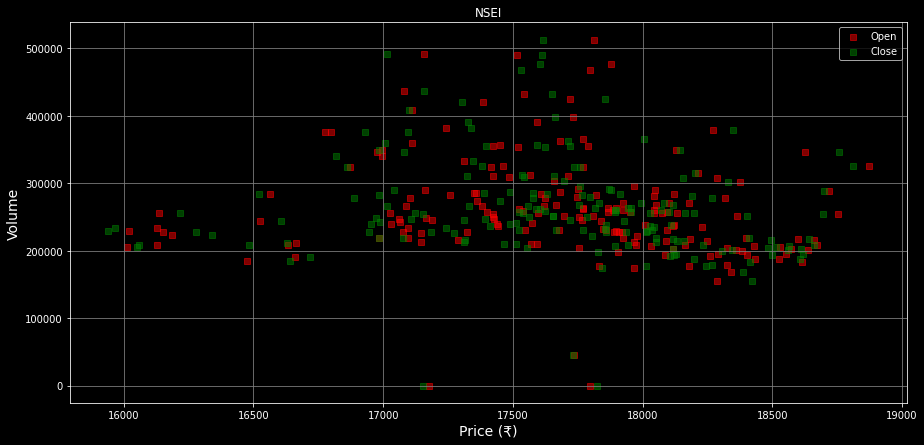

In [14]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], nsei["Volume"], color="red", marker="s", alpha=0.50, label="Open")
plt.scatter(nsei["Close"], nsei["Volume"], color="green", marker="s", alpha=0.50, label="Close")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Price (₹)",fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.title("NSEI")
plt.legend()
plt.show()
plt.close()

In [15]:
reliance = yf.Ticker("RELIANCE.NS")
reliance_history = reliance.history(period="180d")
reliance = reliance_history
reliance.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-07-11 00:00:00+05:30,2369.366403,2421.509461,2362.885914,2416.624023,6390604,0.0,0.0
2022-07-12 00:00:00+05:30,2396.783996,2432.376788,2396.783996,2413.184570,4974502,0.0,0.0
2022-07-13 00:00:00+05:30,2420.013995,2426.693835,2365.876939,2370.413330,6564435,0.0,0.0
2022-07-14 00:00:00+05:30,2380.831909,2426.643931,2369.815029,2389.954346,7831798,0.0,0.0
2022-07-15 00:00:00+05:30,2407.750905,2407.750905,2375.946757,2394.590576,4431880,0.0,0.0
2022-07-18 00:00:00+05:30,2413.733000,2417.720994,2385.119196,2414.979248,6996757,0.0,0.0
2022-07-19 00:00:00+05:30,2393.095082,2439.654854,2393.095082,2429.784668,7587006,0.0,0.0
2022-07-20 00:00:00+05:30,2532.375755,2534.868250,2478.787094,2495.486816,11041036,0.0,0.0
2022-07-21 00:00:00+05:30,2486.513752,2492.495742,2459.893946,2478.836914,7625468,0.0,0.0


In [16]:
reliance.shape

(180, 7)

In [17]:
reliance.isnull().sum()

Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64

In [18]:
reliance.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02,180.000000,180.0
mean,2485.816737,2506.870204,2461.613329,2483.327525,5.773618e+06,0.044444,0.0
std,120.977304,122.091609,121.973653,123.527533,2.474154e+06,0.596285,0.0
min,2215.000000,2220.000000,2180.000000,2201.250000,1.555270e+06,0.000000,0.0
25%,2393.773770,2416.937439,2367.469235,2383.474976,4.002328e+06,0.000000,0.0
50%,2497.875000,2525.275024,2475.443596,2497.393311,5.205140e+06,0.000000,0.0
75%,2584.962463,2605.212463,2564.500000,2583.616882,6.858340e+06,0.000000,0.0
max,2741.800049,2755.000000,2716.000000,2731.350098,1.569755e+07,8.000000,0.0


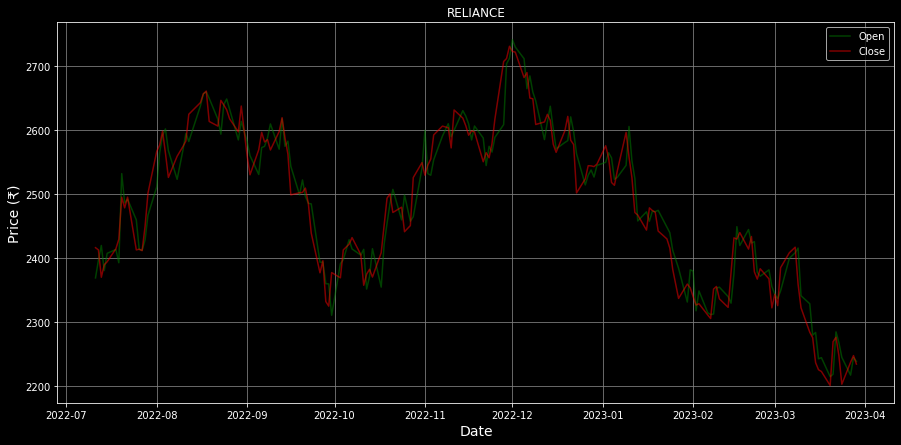

In [19]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.plot(reliance.index, reliance ["Open"], color="green", label="Open", alpha=0.50)
plt.plot(reliance.index, reliance ["Close"], color="red", label="Close", alpha=0.50)
plt.legend()
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("RELIANCE")
plt.show()
plt.close()

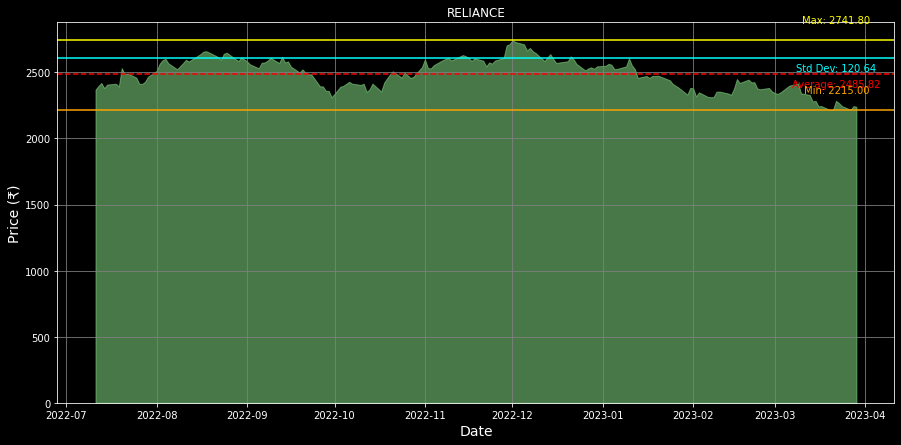

In [20]:
# plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(reliance.index, reliance["Open"], color="lightgreen", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("RELIANCE")

open_avg = reliance["Open"].mean()
open_min = reliance["Open"].min()
open_max = reliance["Open"].max()
open_std = np.std(reliance["Open"])

plt.axhline(open_avg, color="red", label="Open Average", linestyle="--")
plt.axhline(open_min, color="orange", label="Open Min")
plt.axhline(open_max, color="yellow", label="Open Max")
plt.axhline(open_avg + open_std, color="cyan", label="Open Std Dev")

plt.annotate(f"Average: {open_avg:.2f}", (reliance.index[-1], open_avg), xytext=(-20,-15), textcoords='offset points', color='red', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Min: {open_min:.2f}", (reliance.index[-1], open_min), xytext=(-20,15), textcoords='offset points', color='orange', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Max: {open_max:.2f}", (reliance.index[-1], open_max), xytext=(-20,15), textcoords='offset points', color='yellow', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Std Dev: {open_std:.2f}", (reliance.index[-1], open_avg + open_std), xytext=(-20,-15), textcoords='offset points', color='cyan', fontsize=10, ha='center', va='bottom')

plt.show()
plt.close()

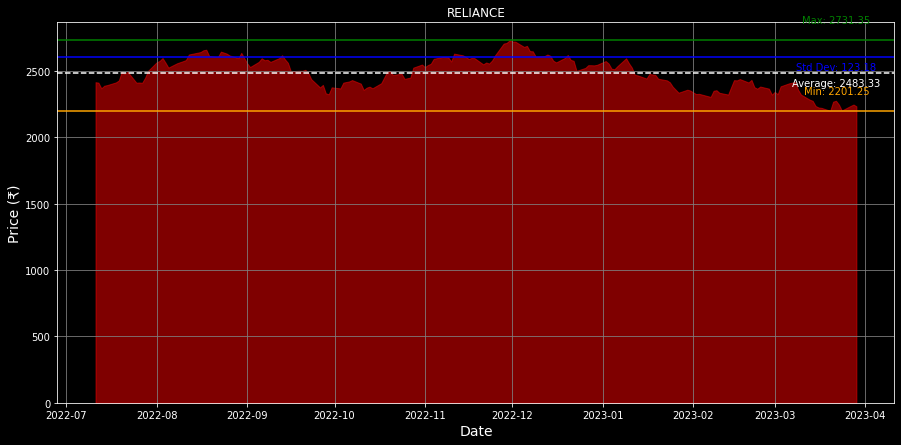

In [21]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(reliance.index, reliance["Close"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Price (₹)",fontsize=14)
plt.title("RELIANCE")

close_avg = reliance["Close"].mean()
close_min = reliance["Close"].min()
close_max = reliance["Close"].max()
close_std = np.std(reliance["Close"])

plt.axhline(close_avg, color="white", label="Close Average", linestyle="--")
plt.axhline(close_min, color="orange", label="Close Min")
plt.axhline(close_max, color="green", label="Close Max")
plt.axhline(close_avg + close_std, color="blue", label="Close Std Dev")

plt.annotate(f"Average: {close_avg:.2f}", (reliance.index[-1], close_avg), xytext=(-20,-15), textcoords='offset points', color='white', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Min: {close_min:.2f}", (reliance.index[-1], close_min), xytext=(-20,15), textcoords='offset points', color='orange', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Max: {close_max:.2f}", (reliance.index[-1], close_max), xytext=(-20,15), textcoords='offset points', color='green', fontsize=10, ha='center', va='bottom')
plt.annotate(f"Std Dev: {close_std:.2f}", (reliance.index[-1], close_avg + close_std), xytext=(-20,-15), textcoords='offset points', color='blue', fontsize=10, ha='center', va='bottom')

plt.show()
plt.close()

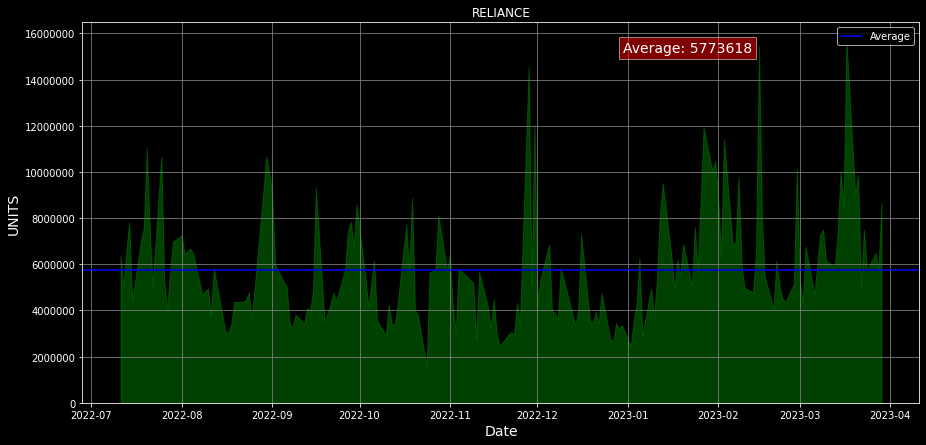

In [22]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, reliance["Volume"], color="green", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("UNITS",fontsize=14)
plt.title("RELIANCE")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = reliance["Volume"].mean()
plt.axhline(average, color="blue", label="Average")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.show()
plt.close()

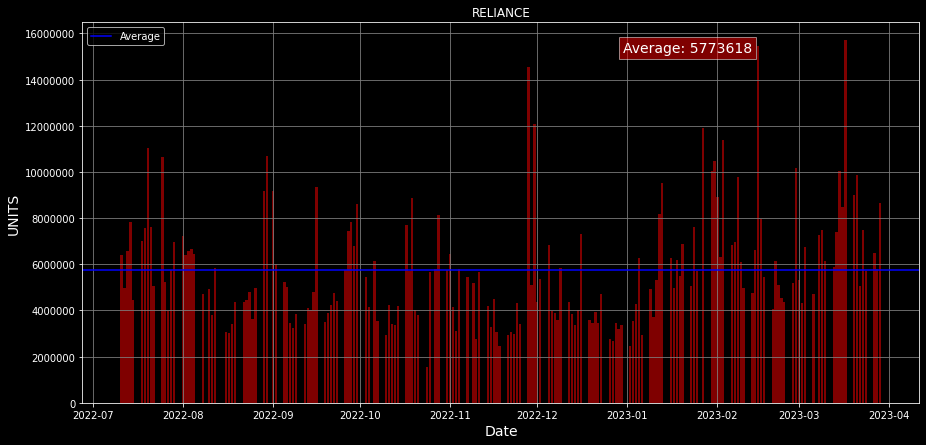

In [23]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.bar(nsei.index, reliance["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("UNITS",fontsize=14)
plt.title("RELIANCE")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = reliance["Volume"].mean()
plt.axhline(average, color="blue", label="Average")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.show()
plt.close()

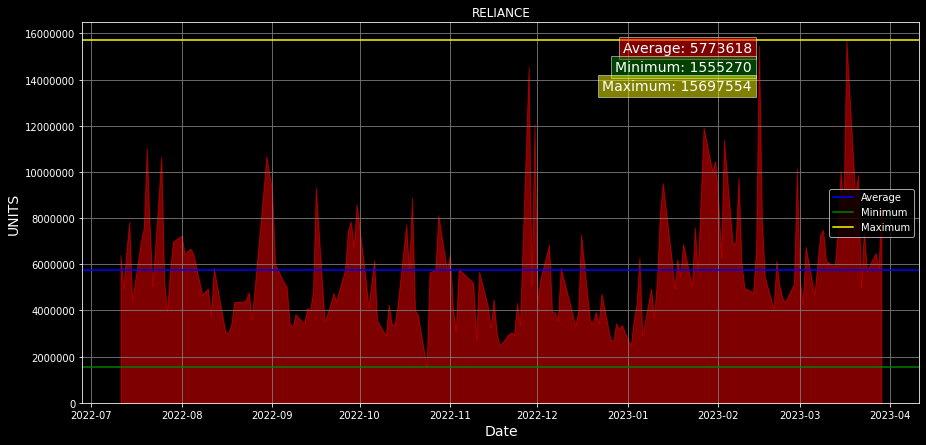

In [24]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.stackplot(nsei.index, reliance["Volume"], color="red", alpha=0.50)
plt.xlabel("Date",fontsize=14)
plt.ylabel("UNITS",fontsize=14)
plt.title("RELIANCE")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

average = reliance["Volume"].mean()
minimum = reliance["Volume"].min()
maximum = reliance["Volume"].max()

plt.axhline(average, color="blue", label="Average")
plt.axhline(minimum, color="green", label="Minimum")
plt.axhline(maximum, color="yellow", label="Maximum")
plt.legend()

plt.text(0.8, 0.95, 'Average: {:.0f}'.format(average), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='red', alpha=0.5))
plt.text(0.8, 0.90, 'Minimum: {:.0f}'.format(minimum), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='green', alpha=0.5))
plt.text(0.8, 0.85, 'Maximum: {:.0f}'.format(maximum), transform=plt.gca().transAxes,
         fontsize=14, verticalalignment='top', horizontalalignment='right',
         bbox=dict(facecolor='yellow', alpha=0.5))
plt.show()
plt.close()

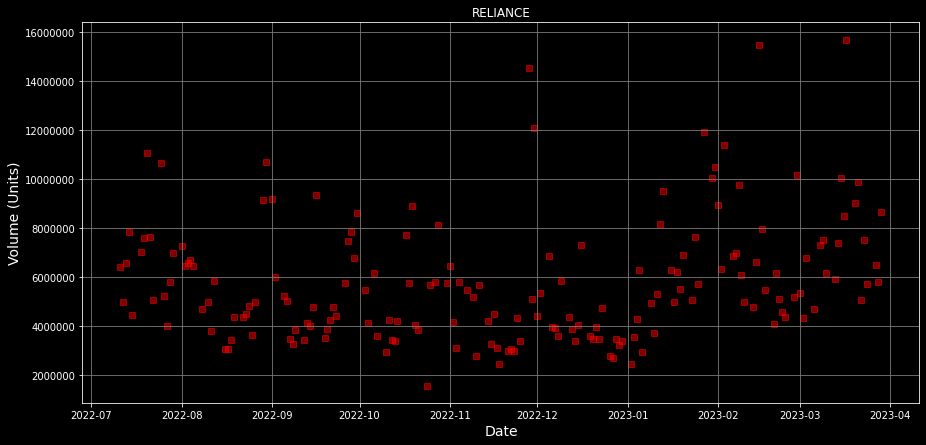

In [25]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, reliance["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("RELIANCE")
plt.show()
plt.close()

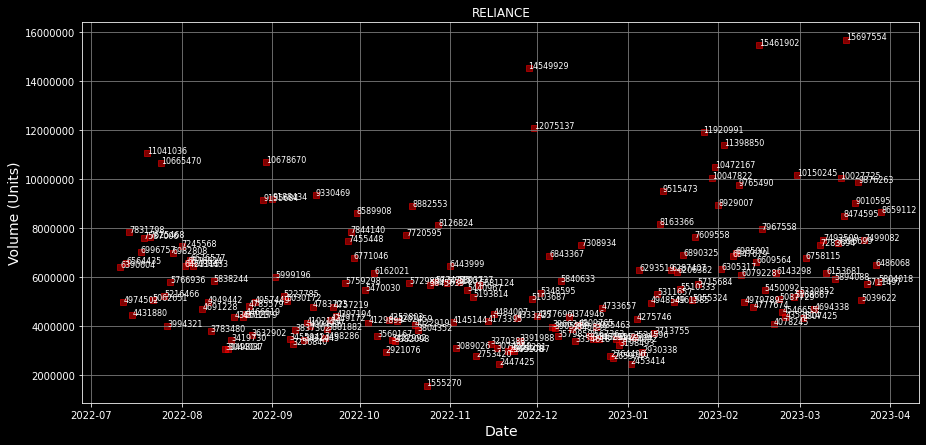

In [26]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei.index, reliance["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("RELIANCE")

for i, txt in enumerate(reliance["Volume"]):
    plt.annotate(txt, (nsei.index[i], reliance["Volume"][i]), fontsize=8)

plt.show()
plt.close()

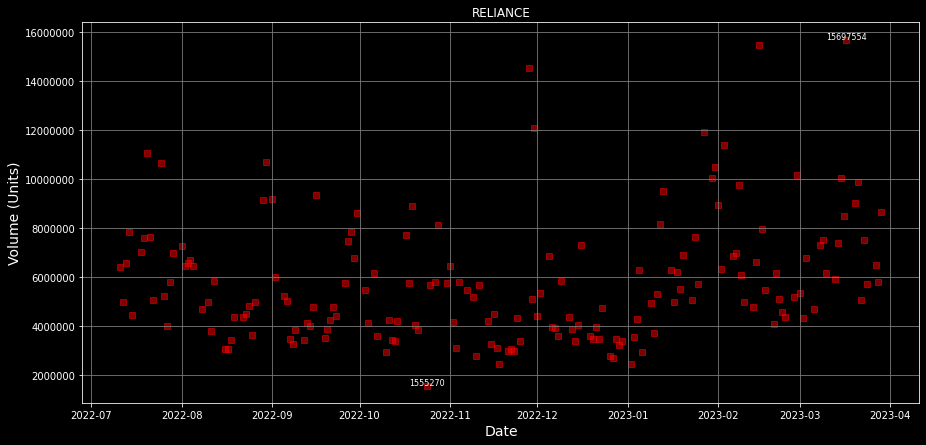

In [27]:
df = pd.DataFrame({"Date": nsei.index, "Volume": reliance["Volume"]})
min_index = reliance["Volume"].idxmin()
max_index = reliance["Volume"].idxmax()

plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(df["Date"], df["Volume"], color="red", marker="s", alpha=0.50)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Date",fontsize=14)
plt.ylabel("Volume (Units)",fontsize=14)
plt.title("RELIANCE")

plt.annotate(df["Volume"][min_index], (df["Date"][min_index], df["Volume"][min_index]), fontsize=8, ha='center')
plt.annotate(df["Volume"][max_index], (df["Date"][max_index], df["Volume"][max_index]), fontsize=8, ha='center')

plt.show()
plt.close()

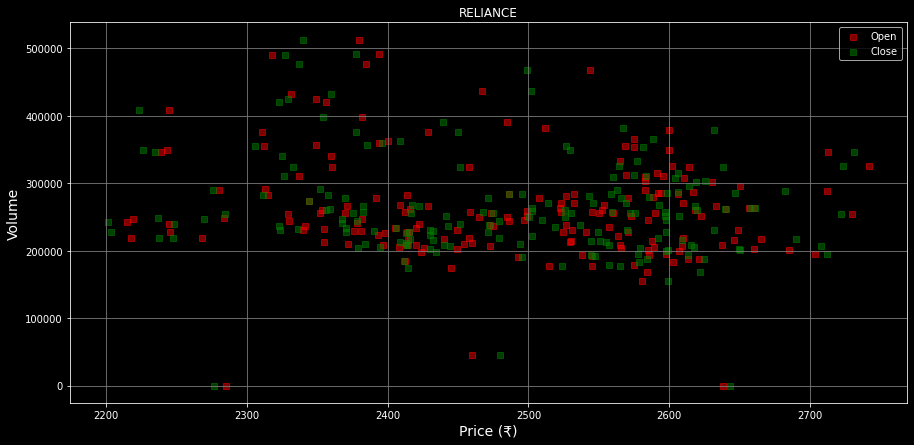

In [28]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(reliance["Open"], nsei["Volume"], color="red", marker="s", alpha=0.50, label="Open")
plt.scatter(reliance["Close"], nsei["Volume"], color="green", marker="s", alpha=0.50, label="Close")
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:.0f}'.format(x)))
plt.xlabel("Price (₹)",fontsize=14)
plt.ylabel("Volume",fontsize=14)
plt.title("RELIANCE")
plt.legend()
plt.show()
plt.close()

In [29]:
# Declaring Independent and Dependent Variable
x = nsei["Open"]
y = reliance["Open"]

In [30]:
y[:10]

Date
2022-07-11 00:00:00+05:30    2369.366403
2022-07-12 00:00:00+05:30    2396.783996
2022-07-13 00:00:00+05:30    2420.013995
2022-07-14 00:00:00+05:30    2380.831909
2022-07-15 00:00:00+05:30    2407.750905
2022-07-18 00:00:00+05:30    2413.733000
2022-07-19 00:00:00+05:30    2393.095082
2022-07-20 00:00:00+05:30    2532.375755
2022-07-21 00:00:00+05:30    2486.513752
2022-07-22 00:00:00+05:30    2492.495878
Name: Open, dtype: float64

In [31]:
y.shape

(180,)

In [32]:
x[:10]

Date
2022-07-11 00:00:00+05:30    16136.150391
2022-07-12 00:00:00+05:30    16126.200195
2022-07-13 00:00:00+05:30    16128.200195
2022-07-14 00:00:00+05:30    16018.849609
2022-07-15 00:00:00+05:30    16010.799805
2022-07-18 00:00:00+05:30    16151.400391
2022-07-19 00:00:00+05:30    16187.049805
2022-07-20 00:00:00+05:30    16562.800781
2022-07-21 00:00:00+05:30    16523.550781
2022-07-22 00:00:00+05:30    16661.250000
Name: Open, dtype: float64

In [33]:
x.shape

(180,)

In [34]:
'''Linear regression is a statistical method used to model the relationship between a dependent variable 
and one or more independent variables by fitting a linear equation to the observed data. In simple linear regression, 
there is only one independent variable and the relationship between the two variables is represented by a line. 
In multiple linear regression, there are two or more independent variables.

'''
def Linear_Regression(x, y):
    #x mean value
    x_mean = sum(x)/len(x)
    #y mean value
    y_mean = sum(y)/len(y)
    #x-x_mean
    x_value = [value - x_mean for value in x]
    #y-y_mean
    y_value = [value - y_mean for value in y]
    #(x-x_mean)*(x-x_mean)
    x_value_square = [x**2 for x in x_value]
    #sum of (x-x_mean)*(x-x_mean)
    x_value_square_total = sum(x_value_square)
    #(x-x_mean)(y-y_mean)
    x_y_value_square = [x*y for x,y in zip(x_value,y_value)]
    #sum of (x-x_mean)(y-y_mean)
    x_y_value_square_total = sum(x_y_value_square)
    #b1 = sigma(x-x_mean)(y-y_mean)/sigma(x-x_mean)*(x-x_mean)
    b1 = x_y_value_square_total/x_value_square_total
    #y = bo + b1 * x
    bo = y_mean - (b1*x_mean)

    return (b1, bo)

In [35]:
# Calculate the regression line
b1, bo = Linear_Regression(x, y)

In [36]:
# Make predictions for all x values
y_pred = [bo + b1 * xi for xi in x]

print(f"The predicted values of y are: {y_pred[:5]}")

The predicted values of y are: [2292.7280777717356, 2291.483667899023, 2291.733795626898, 2278.057988825744, 2277.0512491475843]


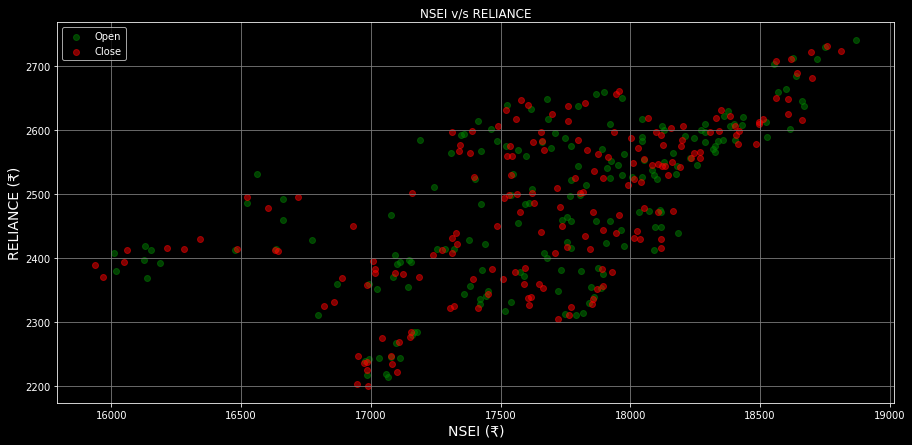

In [37]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCE")
plt.show()
plt.close()

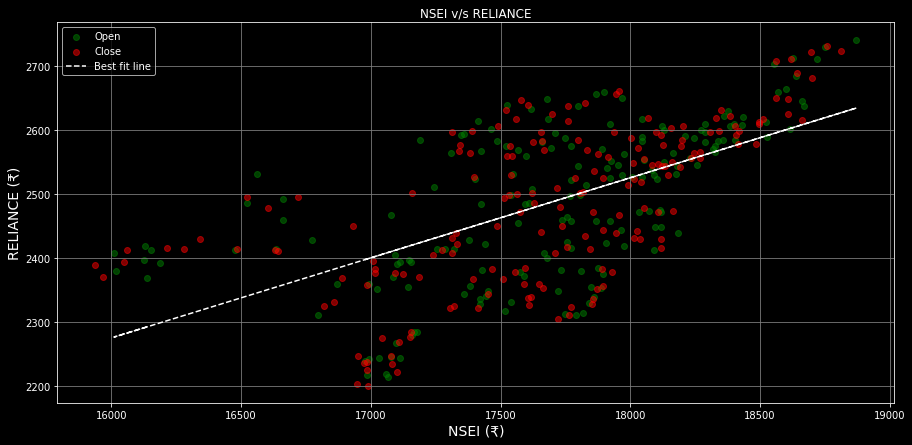

In [38]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.plot(nsei["Open"], y_pred, color="white", linestyle="--", label="Best fit line")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCE")
plt.show()
plt.close()

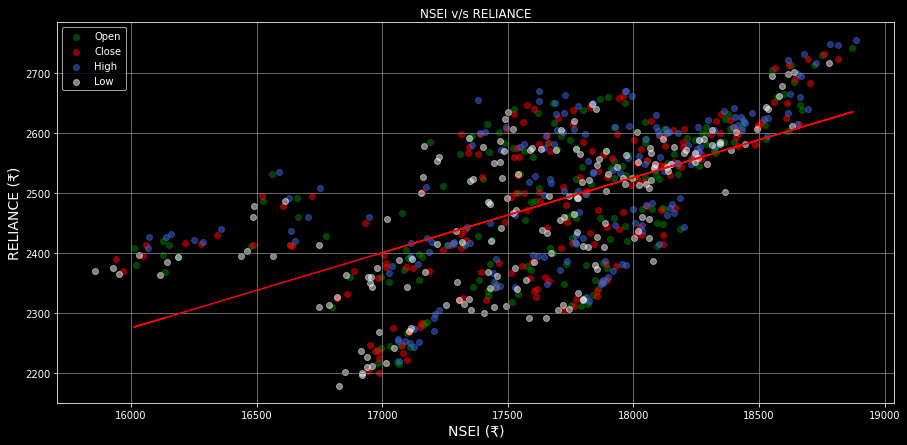

In [39]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.scatter(nsei["High"], reliance["High"], color="royalblue", label="High", alpha=0.50)
plt.scatter(nsei["Low"], reliance["Low"], color="white", label="Low", alpha=0.50)
plt.plot(nsei["Open"], y_pred, color="red")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCE")
plt.show()
plt.close()

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
x = nsei["Open"].values.reshape(-1,1)

In [42]:
y = reliance["Open"].values.reshape(-1,1)

In [43]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [44]:
sk_pred_y = model.predict(x)
sk_pred_y.shape

(180, 1)

In [45]:
sk_pred_y[:5]

array([[2292.72807777],
       [2291.4836679 ],
       [2291.73379563],
       [2278.05798883],
       [2277.05124915]])

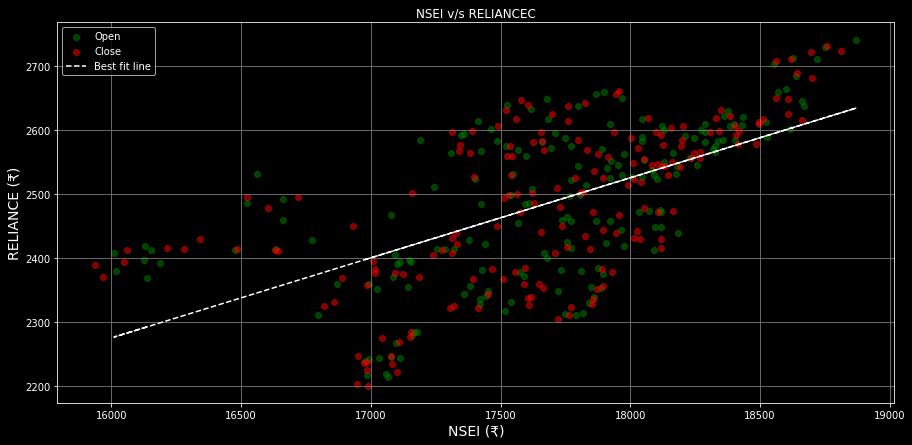

In [46]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.plot(nsei["Open"], sk_pred_y, color="white", linestyle="--", label="Best fit line")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.title("NSEI v/s RELIANCEC")
plt.show()
plt.close()

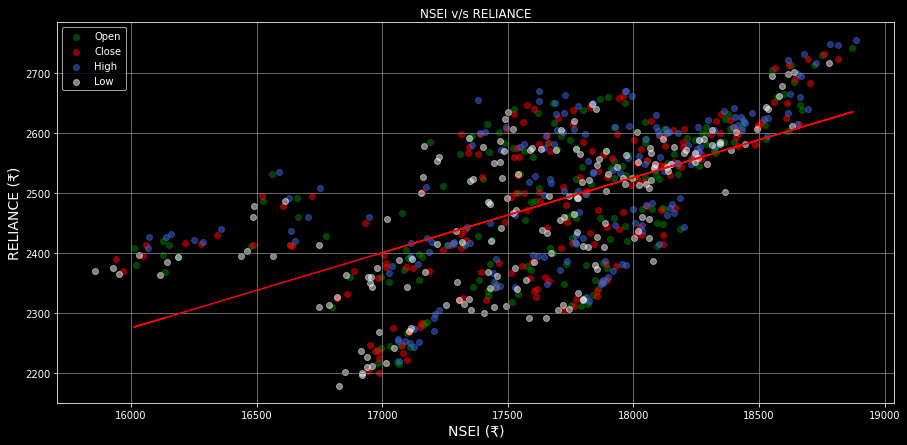

In [47]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.plot(nsei["Open"], sk_pred_y, color="red")
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.scatter(nsei["High"], reliance["High"], color="royalblue", label="High", alpha=0.50)
plt.scatter(nsei["Low"], reliance["Low"], color="white", label="Low", alpha=0.50)
plt.legend()
plt.title("NSEI v/s RELIANCE")
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.show()
plt.close()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x = nsei["Open"].values.reshape(-1,1)
y = reliance["Open"].values.reshape(-1,1)

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
print(f"x train: {x_train.shape}")
print(f"y train: {y_train.shape}")

x train: (144, 1)
y train: (144, 1)


In [52]:
print(f"x test: {x_test.shape}")
print(f"y test: {y_test.shape}")

x test: (36, 1)
y test: (36, 1)


In [53]:
model.fit(x_train, y_train)

LinearRegression()

In [54]:
y_pred = model.predict(x_test)
y_pred.shape

(36, 1)

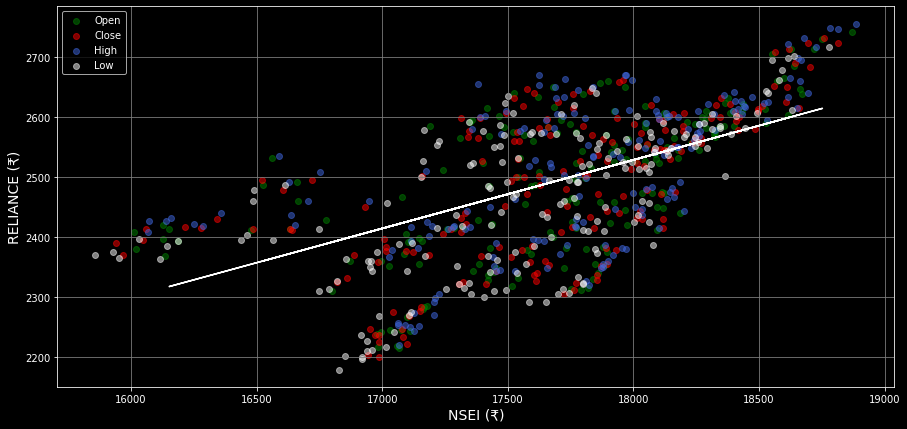

In [55]:
plt.style.use('dark_background')
plt.figure(figsize=(15,7))
plt.grid(True, color='grey')
plt.scatter(nsei["Open"], reliance["Open"], color="green", label="Open", alpha=0.50)
plt.scatter(nsei["Close"], reliance["Close"], color="red", label="Close", alpha=0.50)
plt.scatter(nsei["High"], reliance["High"], color="royalblue", label="High", alpha=0.50)
plt.scatter(nsei["Low"], reliance["Low"], color="white", label="Low", alpha=0.50)
plt.plot(x_test, y_pred, color="white")
plt.legend()
plt.xlabel("NSEI (₹)",fontsize=14)
plt.ylabel("RELIANCE (₹)",fontsize=14)
plt.show()
plt.close()

In [56]:
x = nsei["Open"].values
y = reliance["Open"].values.reshape(-1,1)

In [57]:
x[:5]

array([16136.15039062, 16126.20019531, 16128.20019531, 16018.84960938,
       16010.79980469])

In [58]:
y[:5]

array([[2369.36640253],
       [2396.78399639],
       [2420.01399494],
       [2380.83190874],
       [2407.75090511]])

In [59]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

In [60]:
# Fit a linear regression model to the training data
reg = np.polyfit(x_train, y_train, 1)
b0, b1 = reg[1], reg[0]

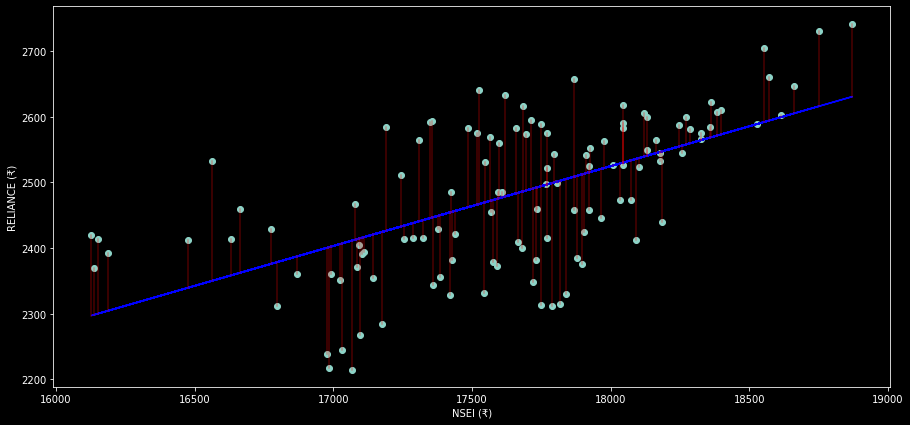

In [61]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, b0 + b1 * x_train, '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], b0 + b1 * x_train[i]], '-r', alpha=0.3)

plt.xlabel('NSEI (₹)')
plt.ylabel('RELIANCE (₹)')
plt.show()

In [62]:
x = nsei["Open"].values.reshape(-1,1)
y = reliance["Open"].values.reshape(-1,1)

In [63]:
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Fit a linear regression model to the training data
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

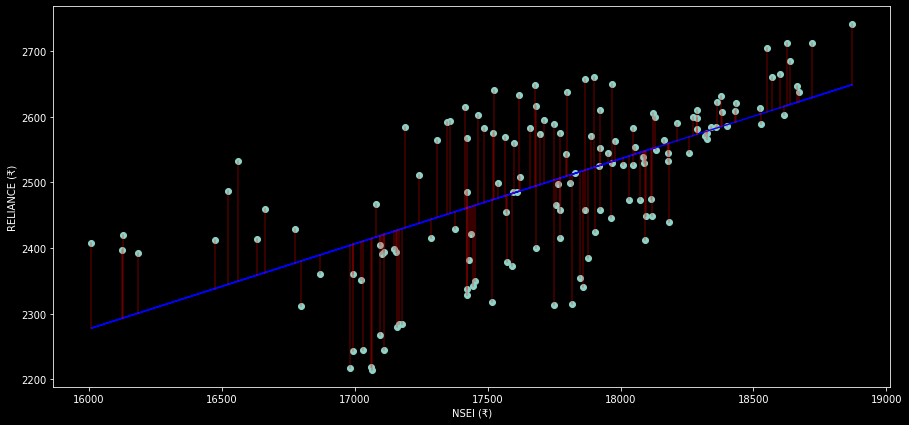

In [64]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], reg.predict(x_train[i].reshape(-1,1))[0]], '-r', alpha=0.3)

plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

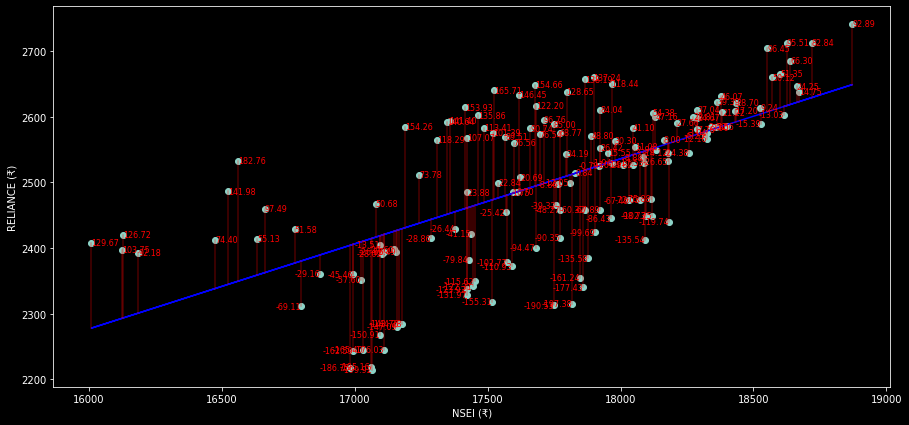

In [65]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    x = x_train[i]
    y = y_train[i]
    error = y - reg.predict(x.reshape(-1,1))[0]
    align = 'left' if error > 0 else 'right'
    plt.plot([x, x], [y, reg.predict(x.reshape(-1,1))[0]], '-', color='red', alpha=0.3)
    plt.text(x+0.1, y+0.1, f'{error[0]:.2f}', color='red', fontsize=8, ha=align, va='center')

plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

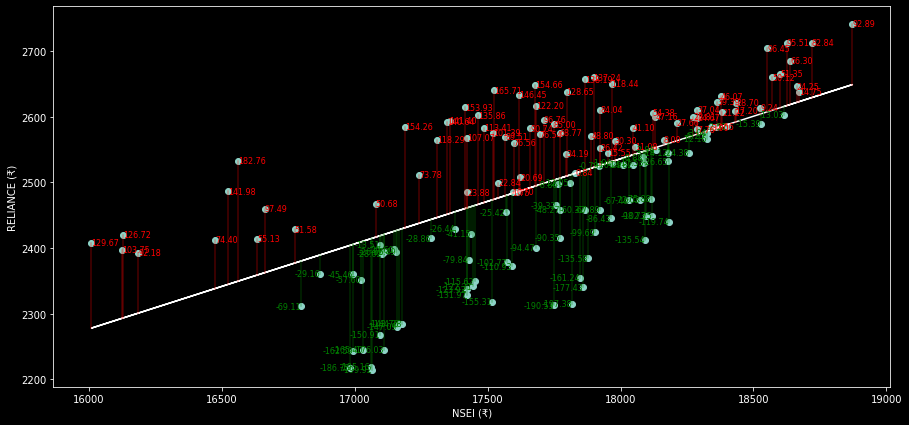

In [66]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b', color="white")

# Calculate the mean error
mean_error = y_train - reg.predict(x_train).flatten()
mean_error = np.mean(mean_error)

# Plot the error terms as red or green lines based on if the error is below or above the mean
for i in range(len(x_train)):
    x = x_train[i]
    y = y_train[i]
    error = y - reg.predict(x.reshape(-1,1))[0]
    align = 'left' if error > 0 else 'right'
    color = 'green' if error < mean_error else 'red'
    plt.plot([x, x], [y, reg.predict(x.reshape(-1,1))[0]], '-', color=color, alpha=0.3)
    plt.text(x+0.1, y+0.1, f'{error[0]:.2f}', color=color, fontsize=8, ha=align, va='center')

plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()

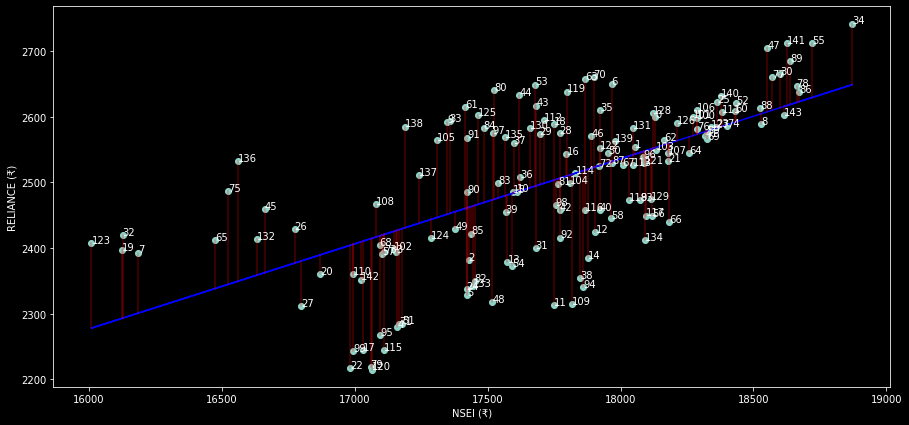

In [67]:
# Plot the training data and the best-fit line
plt.figure(figsize=(15,7))
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), '-b')

# Plot the error terms as red lines
for i in range(len(x_train)):
    plt.plot([x_train[i], x_train[i]], [y_train[i], reg.predict(x_train[i].reshape(-1,1))[0]], '-r', alpha=0.3)

# Label each data point with its index
for i, txt in enumerate(x_train):
    plt.annotate(i, (x_train[i], y_train[i]))
plt.ylabel('RELIANCE (₹)')
plt.xlabel('NSEI (₹)')
plt.show()